In [47]:
# Travis Bowman



import numpy as np
import matplotlib.pyplot as plt


#
#              x0  x1  x2  x3  x4  x5 x6 x7(bies)
X = np.array([[0., 1., 1., 1., 1., 1., 1., 1.], # 0
              [0., 0., 0., 1., 1., 0., 0., 1.], # 1
              [1., 0., 1., 1., 0., 1., 1., 1.], # 2
              [1., 0., 1., 1., 1., 1., 0., 1.], # 3
              [1., 1., 0., 1., 1., 0., 0., 1.], # 4
              [1., 1., 1., 0., 1., 1., 0., 1.], # 5
              [1., 1., 1., 0., 1., 1., 1., 1.], # 6
              [0., 0., 1., 1., 1., 0., 0., 1.], # 7
              [1., 1., 1., 1., 1., 1., 1., 1.], # 8
              [1., 1., 1., 1., 1., 0., 0., 1.]  # 9
              ])

# Desired outputs
y = np.array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]) # 7


In [48]:


# Training the Perceptron
#
# X:   feature data
# y:   outputs
# lr:  learning rate
# t:   number of iterations (epoch)

def stair_step(ws): # threshold activation funtcion
    if ws > 0:   # zero, since bias is introduced
       return 1.0
    else:
       return 0.0

def perceptron_train(X, y, lr):
    w = np.zeros(len(X[0]))    # initialize weights. All 0s for simplicity
    print("intitial weights:", w)
    errors = np.zeros(len(y))  # init vector for errors (desired - outputs)
    Loss = np.array([])                  # init vector for the SSE loss function
    sse = 1
    epoch = 0
    while sse != 0: # around 40 for 8 seg, when zero square comes to zero
        epoch += 1
        for i in range(0, len(X)):
            ws = np.dot(X[i], w)    # calculate weighted sum

            y_out = stair_step(ws)
            errors[i] = (y_out - y[i])**2 # save squared errors

            for j in range(0, len(w)):
                w[j] = w[j] - lr*(y_out-y[i])*X[i][j] # w[j]-alpha*e*x[i][j]
            print("\t", errors[i], " w:", w)

        print("Epoch=", epoch, " w:", w)

        sse = np.sum(errors) # sum squared error

        Loss = np.append(Loss, sse)

    return w, Loss

#####################
#        Main       #
#####################
lr = 1.0    # learning rate. Use 1.0 for simplicity
#t = 7      # number of iterations/epochs
train_complete = False
epoch = 0
w, L = perceptron_train(X, y, lr)

print ("\nLearned weights are:")
print (w, "\n")
print ("Sum-of-squared erros for each epoch are:")
print (L) # Loss

intitial weights: [0. 0. 0. 0. 0. 0. 0. 0.]
	 0.0  w: [0. 0. 0. 0. 0. 0. 0. 0.]
	 0.0  w: [0. 0. 0. 0. 0. 0. 0. 0.]
	 0.0  w: [0. 0. 0. 0. 0. 0. 0. 0.]
	 0.0  w: [0. 0. 0. 0. 0. 0. 0. 0.]
	 0.0  w: [0. 0. 0. 0. 0. 0. 0. 0.]
	 0.0  w: [0. 0. 0. 0. 0. 0. 0. 0.]
	 0.0  w: [0. 0. 0. 0. 0. 0. 0. 0.]
	 1.0  w: [0. 0. 1. 1. 1. 0. 0. 1.]
	 1.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
Epoch= 1  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-1. -1.  0.  0.  0. -1. -1.  0.]
	 1.0  w: [-1. -1.  1.  1.  1. -1. -1.  1.]
	 0.0  w: [-1. -1.  1.  1.  1. -1. -1.  1.]
	 1.0  w: [-2. -2.  0.  0.  0. -1. -1.  0.]
Epoch= 2  w: [-2. -2.  0.  0.  0. -1. -1.  0.]
	 0.0  w: [-2. -2.  0.  0.  0. -1. -1.  0.]
	 

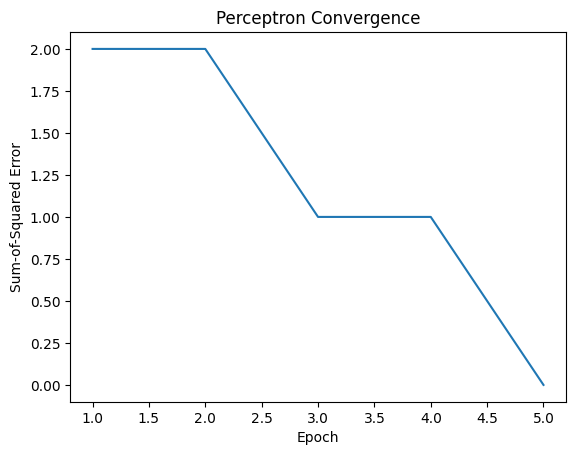

In [49]:
                                       # L: Loss array
epoch = np.linspace(1, len(L), len(L)) # start, stop, # of samples to generate

plt.plot(epoch, L)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')
plt.show()

In [50]:
# inference with slighly modified unseen data during training
x1 = [[0.0, 0.5, 1.1, 1.0, 1.2, 0.0, 0.0, 1.0],
      [0.9, 1.1, 1.0, 0.0, 1.1, 1.0, 0.0, 1.0],
      [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0],
      [0.9, 1.0, 1.0, 1.0, 1.1, 0.0, 0.5, 1.0],
      [1.2, 1.0, 1.0, 1.1, 1.0, 1.0, 0.8, 1.0]]
print("Input x1", "\t\t", "wsum", "\t", "Output y")
for i in range(0, len(x1)):
    ws = np.dot(x1[i], w)
    print(x1[i], "\t", ws, "\t", stair_step(ws))

Input x1 		 wsum 	 Output y
[0.0, 0.5, 1.1, 1.0, 1.2, 0.0, 0.0, 1.0] 	 0.10000000000000009 	 1.0
[0.9, 1.1, 1.0, 0.0, 1.1, 1.0, 0.0, 1.0] 	 -4.0 	 0.0
[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0] 	 -2.0 	 0.0
[0.9, 1.0, 1.0, 1.0, 1.1, 0.0, 0.5, 1.0] 	 -3.3 	 0.0
[1.2, 1.0, 1.0, 1.1, 1.0, 1.0, 0.8, 1.0] 	 -5.2 	 0.0
